In [1]:
from residualphase import residual_phase
import librosa
import scipy
import matplotlib.pyplot as plt

## Loading audio file

We load a sample audio file from librosa. $y$ contains the wave data and $sr$ the sample rate.

In [2]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=4.45)

In [3]:
print(sr)

22050


## Residual phase

The residual phase is calculated from the linear prediction (LP) residual of a wave signal. <br>
The calculation of LP residual is equal to the error between the actual signal $s(n)$ and the LP-predicted value $\hat{s}(n) $ given by $^{[1]}$ <br>

$r(n) = s(n) - \hat{s}(n) = s(n) - \sum_{k=1}^p a_k s(n-k) $, <br>

where $p$ is the order of prediction and $a_k$ are the linear prediction coefficients obtained from LP analysis. <br>

[1] Emotion Recognition using Speech Features,  Rao, K. et al., springer (2017)

### Linear Prediction residual calculation

The calculation of the linear prediction coefficients is done by 'librosa.core.lpc' via Burg’s method. <br>
Then 'scipy.signal.lfilter' is used to calculate the LP residual by inverse filtering.

In [8]:
a = librosa.lpc(y, order=16)
y_lp = scipy.signal.lfilter([0] + -1 * a[1:], [1], y)

# LP residual
y_r = y - y_lp

The original signal, as well as the LP and LP residual signals are plotted below. <br> 

/Users/alessandro/projects/coding/venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


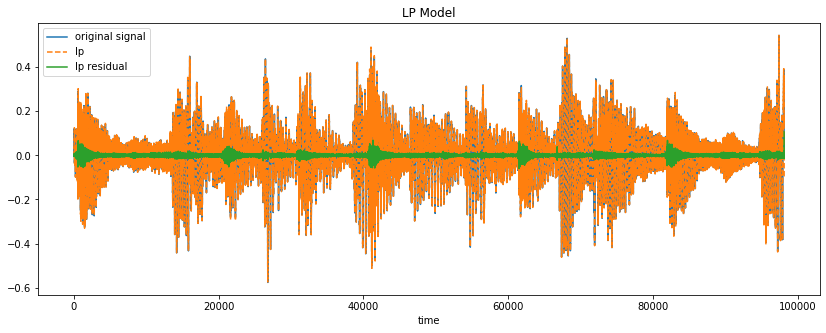

In [9]:
plt.figure(figsize=(14, 5))

plt.plot(y ,label='original signal')
plt.plot(y_lp, linestyle='--', label='lp')
plt.plot(y_r, linestyle='-', label='lp residual')

plt.title('LP Model')
plt.xlabel('time')
plt.legend()
plt.show()

### Plotting the spectra of the original, and LP residual

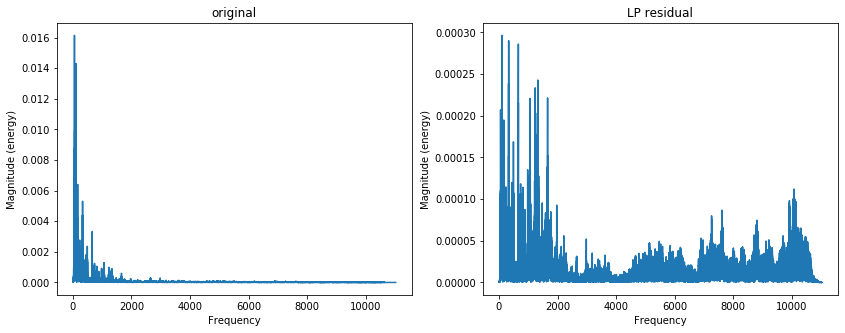

In [8]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title('original')
plt.magnitude_spectrum(y, Fs=sr) 
plt.subplot(1, 2, 2)
plt.title('LP residual')
plt.magnitude_spectrum(y_r, Fs=sr) 
plt.show()

### Residual phase calculation

Once we have the LP residual, its analytical representation is obtained by: <br>

$r_a(n) =  r(n) + j r_h (n) $,

where $j r_h (n)$ is the Hilbert transform of r(n). <br>
Froom this, the residual phase is defined as the cosine of the phase function of the analytic signal:

$\cos (\theta (n)) = \frac{Re[r_a (n)]}{|r_a (n)|} .$

In [ ]:
# Residual phase
res_phase = residual_phase(y)